In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
pkg_path = "/nfs/homedirs/yuny/project-1/audio_classification"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)

pkg_path = "/nfs/homedirs/yuny/project-1/foolbox"
if pkg_path not in sys.path:
    sys.path.append(pkg_path)

import os
import yaml
import torch
from audio_classification.tools import attack_model, attack_model_for_randomize_smoothing
from audio_classification.tools.foolbox_attack import attack_model_per_class

torch.cuda.empty_cache()
# device = torch.device('cpu')
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
project_dir = '/nfs/homedirs/yuny/project-1/'
save_folder = '/nfs/homedirs/yuny/project-1/graphs/'

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw-ls0.1-random-augment', 'SAVE_PATH': '../weights/final/', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 4, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'random', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '../datasets/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'None'}, 'LOSS': 'label_smoothing_cross_entropy', 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'GAMMA': 0.5, 'LEARNING_RATE': 0.001, 'LOG_PATH': '../logs/final/', 'MAX_EPOCH': 125, 'MIN_EPOCH': 1, 'NUM_GPUS': 1, 'SIGMA': 1, 'STEP_SIZE': 25, 'WEIGHT_DECAY': 0.001}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data 

/nfs/homedirs/yuny/project-1/foolbox/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 90.97 seconds
[0.8666666666666667, 0.75, 0.7, 0.6166666666666667, 0.6666666666666667, 0.6166666666666667, 0.41666666666666663, 0.44999999999999996, 0.4, 0.33333333333333337, 0.35, 0.44999999999999996, 0.41666666666666663, 0.3833333333333333, 0.2833333333333333, 0.35, 0.44999999999999996, 0.33333333333333337, 0.3833333333333333, 0.30000000000000004]


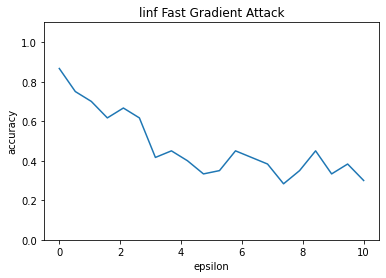

In [4]:
# Run adversarial attacks with multiple attack raidus 
torch.cuda.empty_cache()
project="BMW"
max_rad = 10
title = 'crnn-bmw-ls0.1-random-augment'
config_path = 'logs/final/crnn-bmw-ls0.1-random-augment/version_3/hparams.yaml'
pretrained_path = 'weights/final/crnn-bmw-ls0.1-random-augment-epoch=26-val_acc=1.000.ckpt'
attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'linf', 
             max_radius=max_rad, save_folder=save_folder)

{'ATTACK': True, 'CHECKPOINT': {'SAVE_NAME': 'crnn-bmw-ls0.1-random-augment', 'SAVE_PATH': '../weights/final/', 'SAVE_TOP_K': 1}, 'DATALOADER': {'BATCH_SIZE': 4, 'NUM_WORKERS': 20}, 'DATASET': {'ANNOTATION_PATH': '/nfs/students/winter-term-2020/project-1/datasets/BMW/meta/bmw.csv', 'AUGMENTATION': 'random', 'FOLDER_PATH': '/nfs/students/winter-term-2020/project-1/datasets/Brake_Noise', 'NAME': 'BMW', 'NOISE_PATH': '../datasets/MUSAN/free-sound/', 'VAL_FOLD': 2, 'WEIGHT': 'None'}, 'LOSS': 'label_smoothing_cross_entropy', 'MODEL': {'CRNN': {'INCLUDE_TOP': True, 'INCLUDE_TRANSFORM': False, 'RANDOMISED_SMOOTHING': False}, 'NAME': 'LitCRNN', 'NUM_CLASSES': 6}, 'SOLVER': {'GAMMA': 0.5, 'LEARNING_RATE': 0.001, 'LOG_PATH': '../logs/final/', 'MAX_EPOCH': 125, 'MIN_EPOCH': 1, 'NUM_GPUS': 1, 'SIGMA': 1, 'STEP_SIZE': 25, 'WEIGHT_DECAY': 0.001}, 'TRANSFORM': {'HOP_LENGTH': 256}}
Transformed raw audio into melspectrogram in dataloader.
Data augmentation for BMW dataset: none
Range of the input data 

/nfs/homedirs/yuny/project-1/foolbox/foolbox/models/pytorch.py:37: UserWarning: The PyTorch model is in training mode and therefore might not be deterministic. Call the eval() method to set it in evaluation mode if this is not intended.
  "The PyTorch model is in training mode and therefore might"


Generated attacks in 231.09 seconds
[0.8666666666666667, 0.8166666666666667, 0.85, 0.8333333333333334, 0.8166666666666667, 0.7833333333333333, 0.75, 0.75, 0.75, 0.75, 0.7666666666666666, 0.75, 0.75, 0.7333333333333334, 0.75, 0.7333333333333334, 0.7, 0.7333333333333334, 0.7333333333333334, 0.7333333333333334, 0.75, 0.7333333333333334, 0.6833333333333333, 0.7333333333333334, 0.6833333333333333, 0.7166666666666667, 0.6833333333333333, 0.7166666666666667, 0.7166666666666667, 0.6833333333333333, 0.75, 0.7, 0.7166666666666667, 0.7, 0.6833333333333333, 0.6833333333333333, 0.65, 0.7, 0.65, 0.65, 0.65, 0.65, 0.6333333333333333, 0.7, 0.6666666666666667, 0.65, 0.6333333333333333, 0.6833333333333333, 0.6333333333333333, 0.6666666666666667]


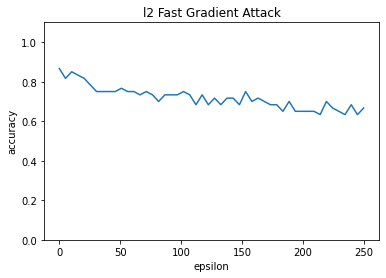

In [3]:
# Run adversarial attacks with multiple attack raidus 
torch.cuda.empty_cache()
project="BMW"
max_rad = 250
title = 'crnn-bmw-ls0.1-random-augment'
config_path = 'logs/final/crnn-bmw-ls0.1-random-augment/version_3/hparams.yaml'
pretrained_path = 'weights/final/crnn-bmw-ls0.1-random-augment-epoch=26-val_acc=1.000.ckpt'
attack_model(project_dir, config_path, pretrained_path, title, 
                                     project=project, attack_type = 'l2', 
             max_radius=max_rad, save_folder=save_folder)